## Observations and Insights 

Observation:
1. Out of 249 test subjects, gender distribution between male and female are very close to each other at 50.2% and 49.8% respectively. It appears that gender distribution has been set to be close to allow a fair assessment on the effectiveness of drug treatment across gender.

2. The test have been carried out across 10 drugs with a sample of 25 each, with exception for Stelasyn which only has 24 samples. Again, this seems to be attributed to the control environment imposed during testing to allow fair assessment across different drug treatments. The absence of 1 sample from Stelasyn group may have been deemed to have immaterial impact on the results by the scientist carrying out the test

3. It appears that there is a strong positive correlation between weight and tumour size as shown in the last graph, given that its correlation coefficient sits at 0.84. 

4. It also appears that the drug treatment for Capomulin has shown some level of effectiveness in treating the tumor as noted for mouse sample k403, analysis on all mouse samples under Capomulin treatment need to be looked at before making this conclusion.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata,study_results, on="Mouse ID", how='outer')
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df["timepoint ID"]=merged_df["Mouse ID"].map(str)+merged_df["Timepoint"].map(str)
merged_df['Duplicate']=merged_df["timepoint ID"].duplicated()

merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,timepoint ID,Duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320,False
...,...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940,False


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df=merged_df.loc[merged_df['Duplicate']==True]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,timepoint ID,Duplicate
909,g989,Propriva,Female,21,26,0,45.000000,0,g9890,True
911,g989,Propriva,Female,21,26,5,47.570392,0,g9895,True
913,g989,Propriva,Female,21,26,10,49.880528,0,g98910,True
915,g989,Propriva,Female,21,26,15,53.442020,0,g98915,True
917,g989,Propriva,Female,21,26,20,54.657650,1,g98920,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged_df=merged_df.loc[merged_df['Duplicate']==False]
clean_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,timepoint ID,Duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320,False
...,...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940,False


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_merged_df["Mouse ID"].unique())

249

In [7]:
clean_merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,timepoint ID,Duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320,False
...,...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940,False


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group_df=clean_merged_df.groupby('Drug Regimen')
drug_mean=pd.DataFrame(drug_group_df["Tumor Volume (mm3)"].mean())
drug_mean=drug_mean.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Mean (mm3)"})
drug_median=pd.DataFrame(drug_group_df["Tumor Volume (mm3)"].median())
drug_median=drug_median.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Median (mm3)"})
drug_variance=pd.DataFrame(drug_group_df["Tumor Volume (mm3)"].var())
drug_variance=drug_variance.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Var (mm3)"})
drug_std=pd.DataFrame(drug_group_df["Tumor Volume (mm3)"].std())
drug_std=drug_std.rename(columns={"Tumor Volume (mm3)": "Tumor Volume STD (mm3)"})
drug_sem=pd.DataFrame(drug_group_df["Tumor Volume (mm3)"].sem())
drug_sem=drug_sem.rename(columns={"Tumor Volume (mm3)": "Tumor Volume SEM (mm3)"})
# This method is the most straighforward, creating multiple series and putting them all together at the end.
pd.concat([drug_mean,drug_median,drug_variance,drug_std,drug_sem],axis=1)

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Var (mm3),Tumor Volume STD (mm3),Tumor Volume SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group_df["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
# This method produces everything in a single groupby function


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(*args, **kw)>

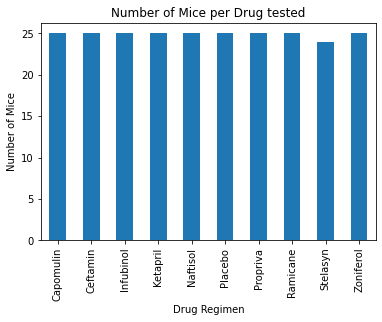

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
unique_mouse=drug_group_df["Mouse ID"].unique()
# drug_list=pd.DataFrame(["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
drug_list=pd.DataFrame(clean_merged_df["Drug Regimen"].sort_values().unique()) #-> note that this dataframe returns a value of 0 on its column
drug_list=drug_list.rename(columns={0:"Drug Regimen"})
mice_list=pd.DataFrame([len(unique_mouse[x]) for x in unique_mouse]) #-> note that this dataframe returns a value of 0 on its column
mice_list=mice_list.rename(columns={0:"Mice Count"})

drug_mice_summary=pd.concat([drug_list,mice_list],axis=1)
drug_mice_summary=drug_mice_summary.set_index("Drug Regimen")
drug_mice_summary.plot(kind='bar', legend=False)

plt.title("Number of Mice per Drug tested")
plt.ylabel("Number of Mice")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

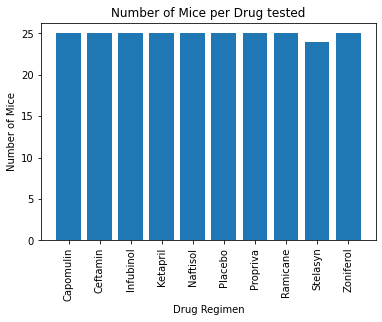

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis=clean_merged_df["Drug Regimen"].sort_values().unique()
y_axis=[len(unique_mouse[x]) for x in unique_mouse]

plt.bar(x_axis,y_axis)
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Drug tested")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show

Text(0.5, 1.0, 'Distribution of Mice based on Gender')

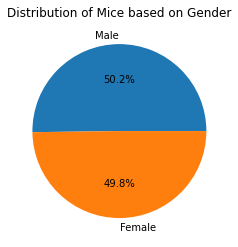

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groupby_df=clean_merged_df.groupby(["Mouse ID","Sex"])
visualised_gender_df=pd.DataFrame(gender_groupby_df.count())

extracted_gender_df=pd.DataFrame(visualised_gender_df.index.get_level_values("Sex"))
gender_list=extracted_gender_df['Sex'].value_counts()
gender_list.plot(kind='pie',autopct="%1.1f%%", label="Distribution of Mice Gender")
plt.axis('off')
plt.title("Distribution of Mice based on Gender")


Text(0.5, 1.0, 'Distribution of Mice based on Gender')

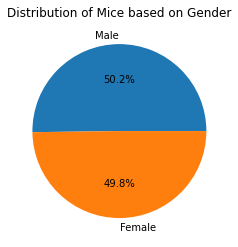

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label=["Male", "Female"]
plt.pie(gender_list,autopct="%1.1f%%", labels=label)
plt.axis('off')
plt.title("Distribution of Mice based on Gender")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
##student comment = extract the greatest timepoint from clean_merged_df by unique Mouse ID, and extract the highest timepoint value using .agg(max)
mouse_groupby=clean_merged_df.groupby('Mouse ID')
max_timepoint=mouse_groupby.agg(max)
##student comment - delete timepoint ID created by .agg(max) as this column currently returns the biggest timepoint ID from the clean_merged_df instead of the timepoint ID where timepoint is the greatest for the unique mouse ID
del max_timepoint['timepoint ID']
##student comment-extract Mouse ID index and place it into a column
max_timepoint['Mouse ID']=max_timepoint.index
##student comment-create a new column for unique timepoint by combining mouse ID and greatest Timepoint generated from above exercise
max_timepoint['timepoint ID']=max_timepoint['Mouse ID'].map(str)+max_timepoint['Timepoint'].map(str)
##student comment - extract only the timepoint ID and Mouse ID from the above DF to allow for merging with clean_merged_df
max_timepoint.drop(max_timepoint.columns.difference(['Mouse ID','timepoint ID']),1, inplace=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
##student comment - create a new merged (inner) dataframe to merge max_timeid with clean_merged df. Delete any duplicated columns
final_tumor_vol=max_timepoint.merge(clean_merged_df, on="timepoint ID", how='inner')
del final_tumor_vol['Mouse ID_y']
final_tumor_vol=final_tumor_vol.rename(columns={'Mouse ID_x':'Mouse ID'})
final_tumor_vol

#---------------------Other Method----------------------------------------- 
# # tumour_timepoint=[]
# # mouse_list=[]
# # for x in range(len(clean_merged_df)-1):
# #     if clean_merged_df.iloc[x+1,0]!=clean_merged_df.iloc[x,0]:
# #         tumour_timepoint.append(clean_merged_df.iloc[x,6])
# #         mouse_list.append(clean_merged_df.iloc[x,0])

# # tumour_timepoint.append(clean_merged_df.iloc[-1,6])
# # mouse_list.append(clean_merged_df.iloc[-1,0])
# # greatest_timepoint=pd.DataFrame({"Mouse ID": mouse_list, "Tumor Volume (mm3)":tumour_timepoint})

# # final_tumor_vol=pd.merge(mouse_metadata,greatest_timepoint, on="Mouse ID")
# # final_tumor_vol
#-------------------------------------------------------------------------

,Mouse ID,timepoint ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
0,a203,a20345,Infubinol,Female,20,23,45,67.973419,2,False
1,a251,a25145,Infubinol,Female,21,25,45,65.525743,1,False
2,a262,a26245,Placebo,Female,17,29,45,70.717621,4,False
3,a275,a27545,Ceftamin,Female,20,28,45,62.999356,3,False
4,a366,a36630,Stelasyn,Female,16,29,30,63.440686,1,False
...,...,...,...,...,...,...,...,...,...,...
244,z435,z43510,Propriva,Female,12,26,10,48.710661,0,False
245,z578,z57845,Ramicane,Male,11,16,45,30.638696,0,False
246,z581,z58145,Infubinol,Female,24,25,45,62.754451,3,False
247,z795,z79545,Naftisol,Female,13,29,45,65.741070,3,False


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_data=final_tumor_vol.loc[final_tumor_vol['Drug Regimen']==(treatment_list[0])]
ramicane_data=final_tumor_vol.loc[final_tumor_vol['Drug Regimen']==(treatment_list[1])]
infubinol_data=final_tumor_vol.loc[final_tumor_vol['Drug Regimen']==(treatment_list[2])]
ceftamin_data=final_tumor_vol.loc[final_tumor_vol['Drug Regimen']==(treatment_list[3])]


#Capomulin
capomulin_quartiles=capomulin_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
capomulin_iqr=capomulin_quartiles[.75]-capomulin_quartiles[.25]
capomulin_upperbound=capomulin_quartiles[.75]+(1.5*capomulin_iqr)
capomulin_lowerbound=capomulin_quartiles[.25]-(1.5*capomulin_iqr)
print(f"Capomulin: Values below {capomulin_lowerbound} or above {capomulin_upperbound} could be outliers.")


#Ramicane
ramicane_quartiles=ramicane_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ramicane_iqr=ramicane_quartiles[.75]-ramicane_quartiles[.25]
ramicane_upperbound=ramicane_quartiles[.75]+(1.5*ramicane_iqr)
ramicane_lowerbound=ramicane_quartiles[.25]-(1.5*ramicane_iqr)
print(f"Ramicane: Values below {ramicane_lowerbound} or above {ramicane_upperbound} could be outliers.")

#Infubinol
infubinol_quartiles=infubinol_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
infubinol_iqr=infubinol_quartiles[.75]-infubinol_quartiles[.25]
infubinol_upperbound=infubinol_quartiles[.75]+(1.5*infubinol_iqr)
infubinol_lowerbound=infubinol_quartiles[.25]-(1.5*infubinol_iqr)
print(f"Infubinol: Values below {infubinol_lowerbound} or above {infubinol_upperbound} could be outliers.")

#Ceftamin
ceftamin_quartiles=ceftamin_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ceftamin_iqr=ceftamin_quartiles[.75]-ceftamin_quartiles[.25]
ceftamin_upperbound=ceftamin_quartiles[.75]+(1.5*ceftamin_iqr)
ceftamin_lowerbound=ceftamin_quartiles[.25]-(1.5*ceftamin_iqr)
print(f"Ceftamin: Values below {ceftamin_lowerbound} or above {ceftamin_upperbound} could be outliers.")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

capomulin_outliers=capomulin_data['Tumor Volume (mm3)'].loc[(capomulin_data['Tumor Volume (mm3)']<capomulin_lowerbound)|(capomulin_data['Tumor Volume (mm3)']>capomulin_upperbound)]

ramicane_outliers=ramicane_data['Tumor Volume (mm3)'].loc[(ramicane_data['Tumor Volume (mm3)']<ramicane_lowerbound)|(ramicane_data['Tumor Volume (mm3)']>ramicane_upperbound)]

infubinol_outliers=infubinol_data['Tumor Volume (mm3)'].loc[(infubinol_data['Tumor Volume (mm3)']<infubinol_lowerbound)|(infubinol_data['Tumor Volume (mm3)']>infubinol_upperbound)]

ceftamin_outliers=ceftamin_data['Tumor Volume (mm3)'].loc[(ceftamin_data['Tumor Volume (mm3)']<ceftamin_lowerbound)|(ceftamin_data['Tumor Volume (mm3)']>ceftamin_upperbound)]

print(f'capomulin outliers: {len(capomulin_outliers)}')
print(f'ramicane outliers: {len(ramicane_outliers)}')
print(f'infubinol outliers: {len(infubinol_outliers)}')
print(f'ceftamin outliers: {len(ceftamin_outliers)}')


Capomulin: Values below 20.70456164999999 or above 51.83201549 could be outliers.
Ramicane: Values below 17.912664470000003 or above 54.30681135 could be outliers.
Infubinol: Values below 36.83290494999999 or above 82.74144559000001 could be outliers.
Ceftamin: Values below 25.355449580000002 or above 87.66645829999999 could be outliers.
capomulin outliers: 0
ramicane outliers: 0
infubinol outliers: 1
ceftamin outliers: 0


{'whiskers': [<matplotlib.lines.Line2D at 0x1efa5cad240>,
 'caps': [<matplotlib.lines.Line2D at 0x1efa5cad940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efa5c9def0>,
 'medians': [<matplotlib.lines.Line2D at 0x1efa5cb8080>,
 'fliers': [<matplotlib.lines.Line2D at 0x1efa5cb8400>,
 'means': []}

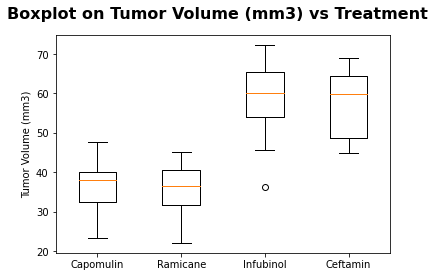

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axs = plt.subplots()
fig.suptitle("Boxplot on Tumor Volume (mm3) vs Treatment", fontsize=16, fontweight="bold")
axs.set_ylabel('Tumor Volume (mm3)')
axs.boxplot([capomulin_data['Tumor Volume (mm3)'],ramicane_data['Tumor Volume (mm3)'],infubinol_data['Tumor Volume (mm3)'],ceftamin_data['Tumor Volume (mm3)']],labels=treatment_list)


## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

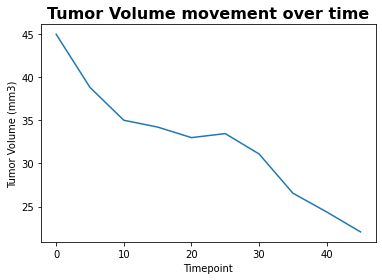

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse='k403'
k403_only=clean_merged_df.loc[clean_merged_df["Mouse ID"]==mouse]
x_axis=k403_only["Timepoint"]
y_axis=k403_only['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis)
plt.title("Tumor Volume movement over time",fontsize=16, fontweight="bold")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

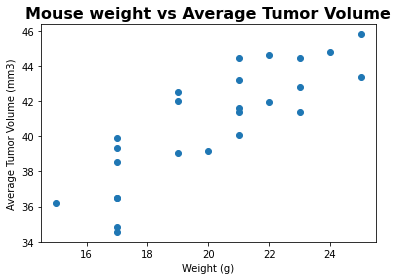

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_only=clean_merged_df.loc[clean_merged_df["Drug Regimen"]=="Capomulin"]
weight_tumor_groupby=capomulin_only.groupby("Mouse ID")
weight_tumor_avg=pd.DataFrame(weight_tumor_groupby.mean())
weight_tumor_avg
x_axis=weight_tumor_avg['Weight (g)']
y_axis=weight_tumor_avg['Tumor Volume (mm3)']
plt.scatter(x_axis, y_axis)
plt.title("Mouse weight vs Average Tumor Volume",fontsize=16, fontweight="bold")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show

## Correlation and Regression

The r-squared is: 0.7088568047708717
The correlation coefficient is: 0.8419363424694718


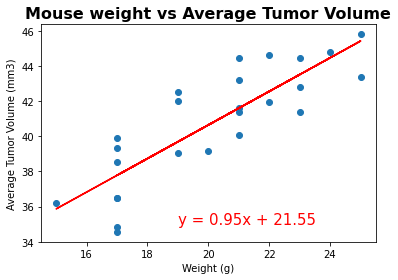

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_only=clean_merged_df.loc[clean_merged_df["Drug Regimen"]=="Capomulin"]
weight_tumor_groupby=capomulin_only.groupby("Mouse ID")
weight_tumor_avg=pd.DataFrame(weight_tumor_groupby.mean())
weight_tumor_avg
x_axis=weight_tumor_avg['Weight (g)']
y_axis=weight_tumor_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(19,35),fontsize=15,color="red")
plt.title("Mouse weight vs Average Tumor Volume",fontsize=16, fontweight="bold")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient is: {rvalue}")
